In [1]:
# Imports
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns

from lib.utility_functions import *
from lib.exp4 import *

# Config
sns.set_style('white')
sns.set_context('poster')

pd.set_option('display.max_columns', 40)

% matplotlib inline

In [2]:
# Read in tidy dataframe (produced in 4 Data Analysis and Exploration)
tidy = pd.read_csv('./tidy_data.csv', index_col=0)
tidy.head()

,Subject ID,Condition,Game Index,Position ID,Is Real,Black Position,White Position,Black Position (final),White Position (final),Response Time,Num Black Pieces,Num White Pieces,Num Pieces,Total Black Errors,Total White Errors,Total Errors,Type I Errors (black),Type I Errors (white),Type I Errors,Type II Errors (black),Type II Errors (white),Type II Errors,Type III Errors (black),Type III Errors (white),Type III Errors,Num Pieces (final),Numerosity Error
0,1464109333721,Trained,0,25.0,False,000000000011010000010100000001010001,001100000000001000001000000010100010,000000000011010000010100100001000000,000100000000100010001011000000000100,43.957,8,7,15,3,10,13.0,1,5,6,2,5,7,0,0,0,14,1
2,1464109333721,Trained,1,92.0,True,001011000000011000000101000000010100,000100000001100100000010100001101000,000001000001011000000101000000010100,000100000000100100001010100000101000,36.897,9,9,18,3,3,5.0,0,1,1,2,1,3,0,1,1,16,2
4,1464109333721,Trained,2,16.0,False,100100000001010000000100000000101000,000010000010000100001001000001000000,100100000001010000000101000000100000,000001000010000100001000000000000000,17.922,7,6,13,2,4,5.0,0,1,1,1,2,3,0,1,1,11,2
6,1464109333721,Trained,3,75.0,True,000001001000101100001001000000010000,000100000001010000010110000000001000,000001001001001100000101000000010000,000100000000110000000010000000001000,22.380,8,7,15,4,4,5.0,0,0,0,1,1,2,1,2,3,13,2
8,1464109333721,Trained,4,69.0,True,000101000101100000001100000000000000,000000000010011000000001000000111000,000101000101100000001100000000000000,000000000010011000000001000000111000,20.494,7,7,14,0,0,0.0,0,0,0,0,0,0,0,0,0,14,0


In [16]:
freq_table = tidy.pivot_table(
    index='Condition', 
    values=['Type I Errors', 'Type II Errors', 'Type III Errors'], 
    aggfunc=np.sum
)

freq_table

,Type I Errors,Type II Errors,Type III Errors
Condition,,,
Naive,2536,7129,1996
Trained,2727,6323,1635


In [15]:
chisq, p, dof, ex = sts.chi2_contingency(freq_table)
print('Chi-square test result: {:.2f}, p={:.4f}'.format(chisq, p))

Chi-square test result: 48.58, p=0.0000


In [19]:
# Make tidier data on error types and check out figures
#    (for own edification)
melted = pd.melt(
    tidy, 
    id_vars=['Condition'],
    value_vars=['Type I Errors', 'Type II Errors', 'Type III Errors'], 
    var_name='Error Type', value_name='Num Errors'
)

melted['Num Errors Dummy'] = melted['Num Errors']
melted.head()

,Condition,Error Type,Num Errors,Num Errors Dummy
0,Trained,Type I Errors,6,6
1,Trained,Type I Errors,1,1
2,Trained,Type I Errors,1,1
3,Trained,Type I Errors,0,0
4,Trained,Type I Errors,0,0


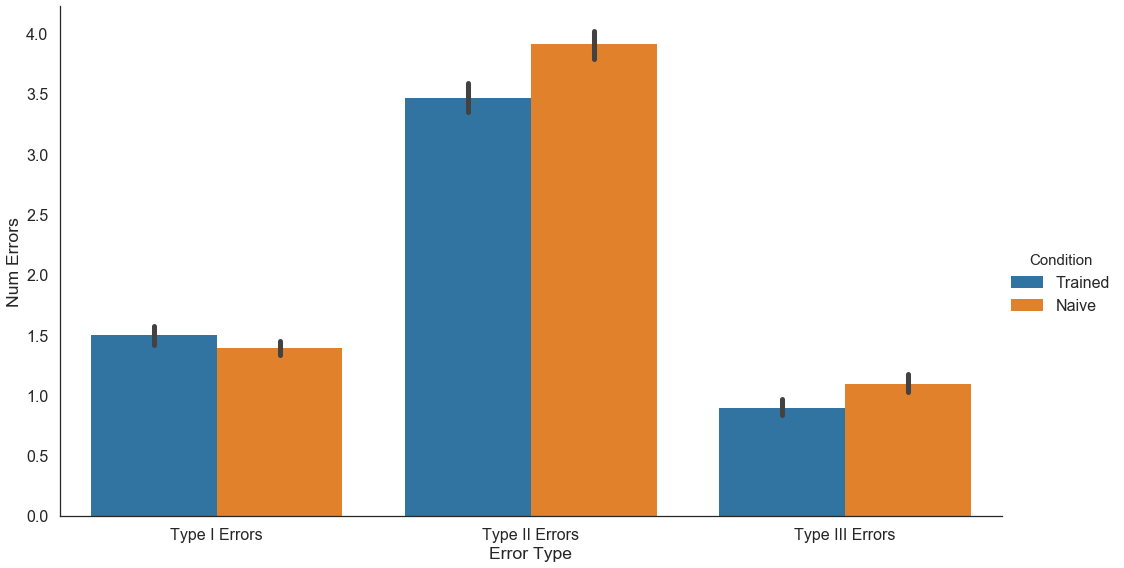

In [22]:
g = sns.factorplot(
    x='Error Type', y='Num Errors', hue='Condition', 
    data=melted, 
    kind='bar',
    legend_out=True, size=8, aspect=16/9
)

sns.despine()

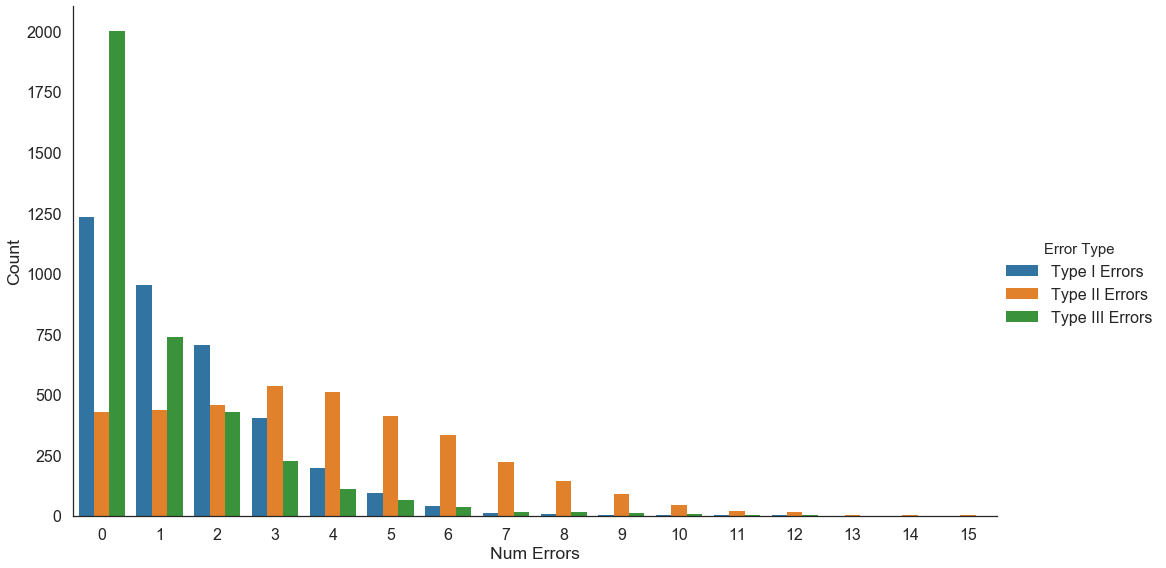

In [85]:
pivoted = melted.pivot_table(
    index='Num Errors', columns='Error Type', 
    values='Num Errors Dummy', 
    aggfunc=len
)

remelted = pd.melt(
    pivoted, 
    value_vars=['Type I Errors', 'Type II Errors', 'Type III Errors'], 
    value_name='Count'
)

remelted['Num Errors'] = remelted.index.values % 16

g = sns.factorplot(
    x='Num Errors', y='Count', hue='Error Type', 
    data=remelted, 
    kind='bar', legend_out=True,
    size=8, aspect=16/9
)

sns.despine(ax=axes)

## Old

The below was a communication mistake, looking at chisq over different error types x different number of occurrences of those errors.

In [4]:
tidy['Type I Error Dummies'] = tidy['Type I Errors']
tidy['Type II Error Dummies'] = tidy['Type II Errors']
tidy['Type III Error Dummies'] = tidy['Type III Errors']

# Get number of observations at each variable level (number of errors)
e1 = tidy.pivot_table(index='Type I Errors', values='Type I Error Dummies', aggfunc=len)
e2 = tidy.pivot_table(index='Type II Errors', values='Type II Error Dummies', aggfunc=len)
e3 = tidy.pivot_table(index='Type III Errors', values='Type III Error Dummies', aggfunc=len)

# Create placeholder dataframe, add error types, and fill in nans with 0
e = pd.DataFrame(index=e2.index.values, columns=['I', 'II', 'III'])
e.loc[e1.index, 'I'] = e1['Type I Error Dummies']
e.loc[e2.index, 'II'] = e2['Type II Error Dummies']
e.loc[e3.index, 'III'] = e3['Type III Error Dummies']

e.fillna(0, inplace=True)

Some of the data is missing. To work with the missing data, I treat errors >= 12 as a single bin. Chi-square test is senstive to binning choices, but here difference is so stark it hardly matters. Is there a principled way to deal with this circumstance?

In [5]:
e

,I,II,III
0,1233,427,2002
1,954,434,738
2,704,458,426
3,403,537,224
4,196,510,110
5,94,412,66
6,39,334,36
7,12,222,15
8,6,141,14
9,2,91,9


In [6]:
# Bin observations of greater than or equal to 12 errors together
e.loc[12, 'I'] += e.iloc[13:]['I'].sum()
e.loc[12, 'II'] += e.iloc[13:]['II'].sum()

In [7]:
# SciPy ChiSq test
chisq, p, dof, ex = sts.chi2_contingency(e.iloc[1:12])
print('Chi-square test result: {:.2f}, p={:.4f}'.format(chisq, p))

Chi-square test result: 1653.97, p=0.0000


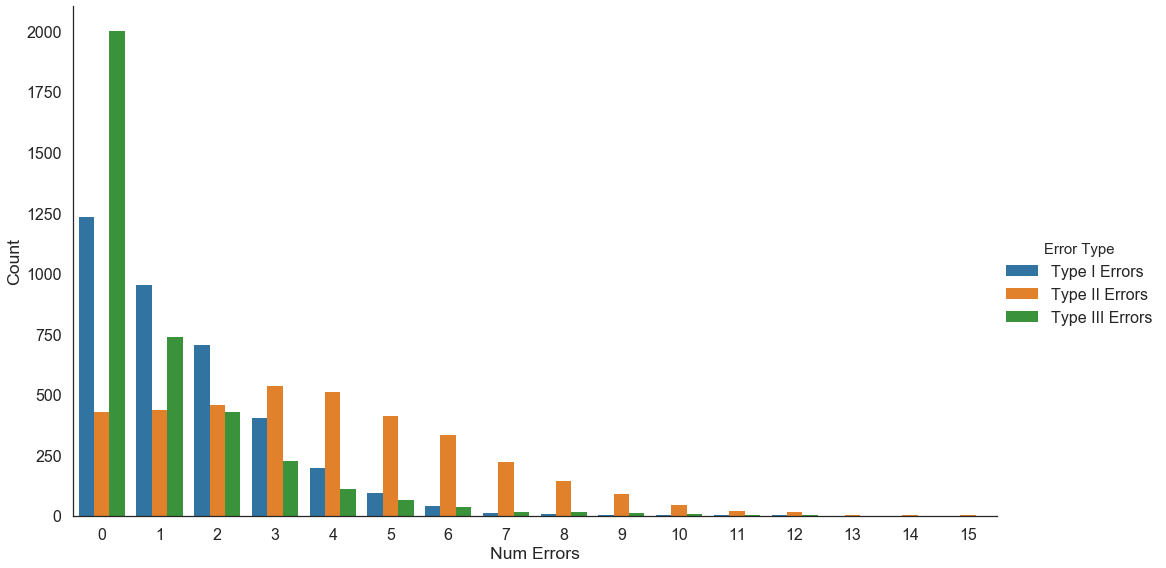

In [85]:
# Make tidier data on error types and check out figures
#    (for own edification)
melted = pd.melt(tidy, value_vars=['Type I Errors', 'Type II Errors', 'Type III Errors'], var_name='Error Type', value_name='Num Errors')

melted['Num Errors Dummy'] = melted['Num Errors']

pivoted = melted.pivot_table(
    index='Num Errors', columns='Error Type', 
    values='Num Errors Dummy', 
    aggfunc=len
)

remelted = pd.melt(
    pivoted, 
    value_vars=['Type I Errors', 'Type II Errors', 'Type III Errors'], 
    value_name='Count'
)

remelted['Num Errors'] = remelted.index.values % 16

g = sns.factorplot(
    x='Num Errors', y='Count', hue='Error Type', 
    data=remelted, 
    kind='bar', legend_out=True,
    size=8, aspect=16/9
)

sns.despine(ax=axes)

### Comments

One alternative to Chi-Sq test could be Kolmogorov-Smirnov test. But I think raw data violate continuous assumption of KS test, as data are relatively low count values in [0, 15]; Chi-Sq is probably more natural choice.

In [8]:
sts.ks_2samp(tidy['Type II Errors'], tidy['Type III Errors'])

Ks_2sampResult(statistic=0.5150767543859649, pvalue=0.0)